In [94]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Import TensorFlow and Keras for model building and training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [95]:
# Define the path to the dataset
dataset_path = r"C:\Users\KIIT0001\Downloads\archive (6)"  # Update this path to your dataset location

# Load the dataset into a structured numpy array
dataset_faces = []
for person in range(1, 41):
    temp = []
    for pose in range(1, 11):
        image_path = f'{dataset_path}/s{person}/{pose}.pgm'
        image = plt.imread(image_path)
        temp.append(image)
    dataset_faces.append(np.array(temp))
dataset_faces = np.array(dataset_faces)

# Print the dataset information
print('Total number of datasets:', len(dataset_faces))
print('Dataset size:', dataset_faces.shape)

Total number of datasets: 40
Dataset size: (40, 10, 112, 92)


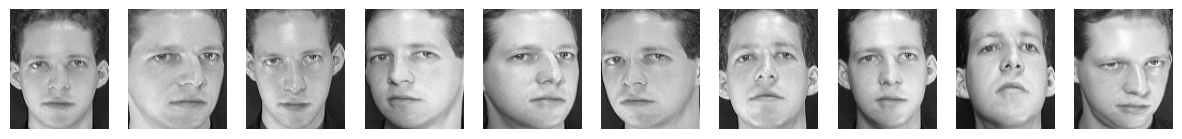

In [96]:
def plot_images(images, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Plot images from the first subject to get a sense of the data
plot_images(dataset_faces[0])

In [97]:
num_subjects, num_images_per_subject, height, width = dataset_faces.shape
X = dataset_faces.reshape(num_subjects * num_images_per_subject, height, width, 1)  # Adding channel dimension
y = np.repeat(np.arange(num_subjects), num_images_per_subject)

# Split the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [98]:
# Normalize pixel values for model input
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_subjects)
y_test = to_categorical(y_test, num_subjects)
y_val = to_categorical(y_val, num_subjects)

In [99]:
pip install keras tensorflow


Note: you may need to restart the kernel to use updated packages.


In [100]:
from tensorflow.keras import layers,models

In [101]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape
from keras.optimizers import Adam

# Assuming height, width, num_subjects are defined

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(height, width, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Reshape((1, 512)),  # Reshape to add the required 3D shape for LSTM
    LSTM(units=128),    # LSTM layer expects a 3D input
    Dense(num_subjects, activation='softmax')  # Direct Dense layer to produce the final output
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 110, 90, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 110, 90, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 55, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 53, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 53, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 26, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 24, 19, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 24, 19, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 12, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 27648)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │    14,156,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,861,096 (56.69 MB)

 Trainable params: 14,860,200 (56.69 MB)

 Non-trainable params: 896 (3.50 KB)

In [102]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (240, 112, 92, 1)
y_train shape: (240, 40)
X_val shape: (80, 112, 92, 1)
y_val shape: (80, 40)


In [103]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_val = y_val.reshape(y_val.shape[0], -1)


In [104]:
from keras.utils import to_categorical

y_train = to_categorical(y_train.argmax(axis=-1), num_classes=num_subjects)
y_val = to_categorical(y_val.argmax(axis=-1), num_classes=num_subjects)


In [105]:
from  tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
model_checkpoint=ModelCheckpoint('best_model.keras',monitor='val_loss',save_best_only=True)




In [106]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)#callbacks=[early_stopping,model_checkpoint])


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0446 - loss: 3.6385 - val_accuracy: 0.0125 - val_loss: 3.6879
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 985ms/step - accuracy: 0.2179 - loss: 3.3339 - val_accuracy: 0.0125 - val_loss: 3.6861
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2739 - loss: 3.2671 - val_accuracy: 0.0125 - val_loss: 3.6886
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3600 - loss: 3.0353 - val_accuracy: 0.0125 - val_loss: 3.6955
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4098 - loss: 2.9360 - val_accuracy: 0.0125 - val_loss: 3.6991
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4509 - loss: 2.7590 - val_accuracy: 0.0125 - val_loss: 3.7049
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5209 - loss: 2.6452 - val_accuracy: 0.0125 - val_loss: 3.7162
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6083 - loss: 2.5055 - val_accuracy: 0.0125 - val_loss: 3.7224
Ep

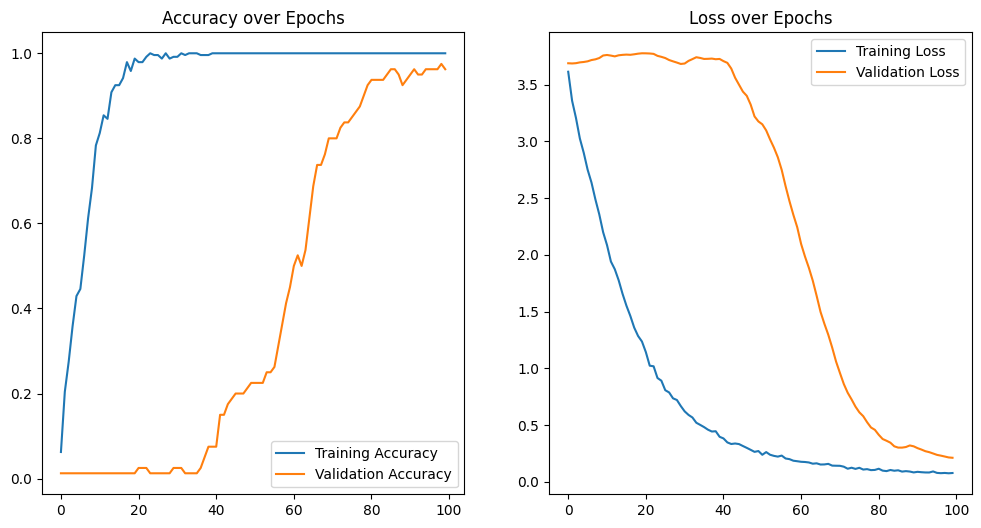

In [107]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [109]:
y_test = to_categorical(y_test.reshape(y_test.shape[0], -1).argmax(axis=1), num_classes=num_subjects)


In [110]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9117 - loss: 0.3179
Test accuracy: 0.925000011920929


In [111]:
y_train = to_categorical(y_train, num_classes=num_subjects)
y_val = to_categorical(y_val, num_classes=num_subjects)
from sklearn.metrics import classification_report

# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test is also in the shape (samples, 40, 40)
y_test = y_test.reshape(y_test.shape[0], -1).argmax(axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       

c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [112]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.9541666666666668
Recall_Score:  0.925
F1_Score:  0.9249404761904764


c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


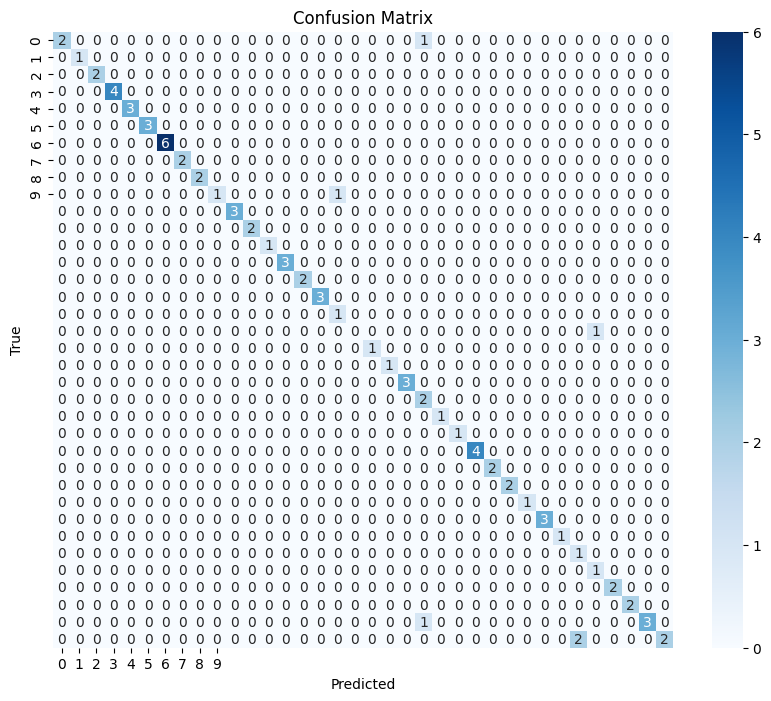

In [113]:
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()